# Solar PV tracking options
Import relevant packages

In [ ]:
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import numpy as np
import os 

import cartopy.crs as ccrs
from cartopy.crs import PlateCarree as plate
import cartopy.io.shapereader as shpreader

import xarray as xr
import atlite

## Select Spain bounds for example

In [4]:
country_name = "Spain"
path = "Spain-2019"
year = "2019"
tmp_dir = os.path.join("./tmp_dir")

- use the shapereader of Cartopy to retrieve high resoluted shapes
- make a GeoSeries with the shapes

In [ ]:
shpfilename = shpreader.natural_earth(resolution='10m',
                                      category='cultural',
                                      name='admin_0_countries')
reader = shpreader.Reader(shpfilename)

country = gpd.GeoSeries({r.attributes['NAME_EN']: r.geometry
                      for r in reader.records()},
                     crs={'init': 'epsg:4326'}
                     ).reindex([country_name])

- create the cutout

In [ ]:
cutout = atlite.Cutout(
    path=path,
    module="era5",
    bounds=country.unary_union.bounds,
    time=year,
    )

cutout.prepare(tmpdir=tmp_dir) 

## Calculate capacity factors for the three solar pv tracking options

- tracking : int 0, 1, 2:
    - 0 for no tracking, default
    - 1 for 1-axis vertical tracking
    - 2 for 2-axis tracking

- No tracking: 

In [7]:
cells = cutout.grid
cap_factors_pv_0axis = cutout.pv(panel='CSi', orientation={'slope': 30., 'azimuth': 180.}, shapes = cells, tracking=0, per_unit=True)

[########################################] | 100% Completed |  6.0s


- 1-axis vertical tracking

In [8]:
cap_factors_pv_1axis = cutout.pv(panel='CSi', orientation={'slope': 30., 'azimuth': 180.}, shapes = cells, tracking=1, per_unit=True)

[########################################] | 100% Completed |  5.8s


- 2-axis vertical tracking

In [9]:
cap_factors_pv_2axis = cutout.pv(panel='CSi', orientation={'slope': 30., 'azimuth': 180.}, shapes = cells, tracking=2, per_unit=True)

[########################################] | 100% Completed |  5.8s


## Compare results

- average capacity factor

In [10]:
print(cap_factors_pv_0axis.mean())
print(cap_factors_pv_1axis.mean())
print(cap_factors_pv_2axis.mean())

<xarray.DataArray ()>
array(0.19215672)
<xarray.DataArray ()>
array(0.23318783)
<xarray.DataArray ()>
array(0.25525843)


- compare time-series capacity factor for a location

In [11]:
point = cells[(cells['y']==40) & (cells['x']==-2.5)].index

In [12]:
cap_factors_pv_0axis_df = cap_factors_pv_0axis.to_pandas()
cap_factors_pv_1axis_df = cap_factors_pv_1axis.to_pandas()
cap_factors_pv_2axis_df = cap_factors_pv_2axis.to_pandas()

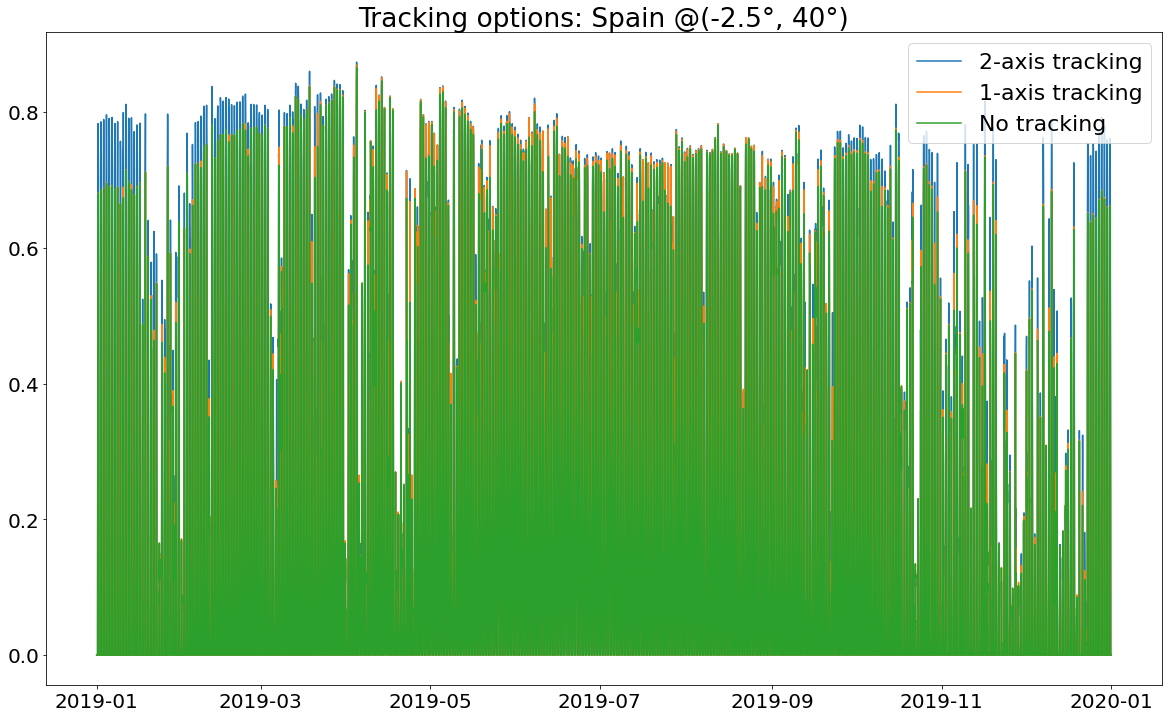

In [14]:
fig = plt.figure()
plt.plot(cap_factors_pv_2axis_df[point])
plt.plot(cap_factors_pv_1axis_df[point])
plt.plot(cap_factors_pv_0axis_df[point])


plt.rcParams["figure.figsize"] = (20,12)
plt.rcParams.update({'font.size': 22})
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)

plt.legend(['2-axis tracking', '1-axis tracking', 'No tracking'])
plt.title('Tracking options: Spain @(-2.5°, 40°)')

plt.show()